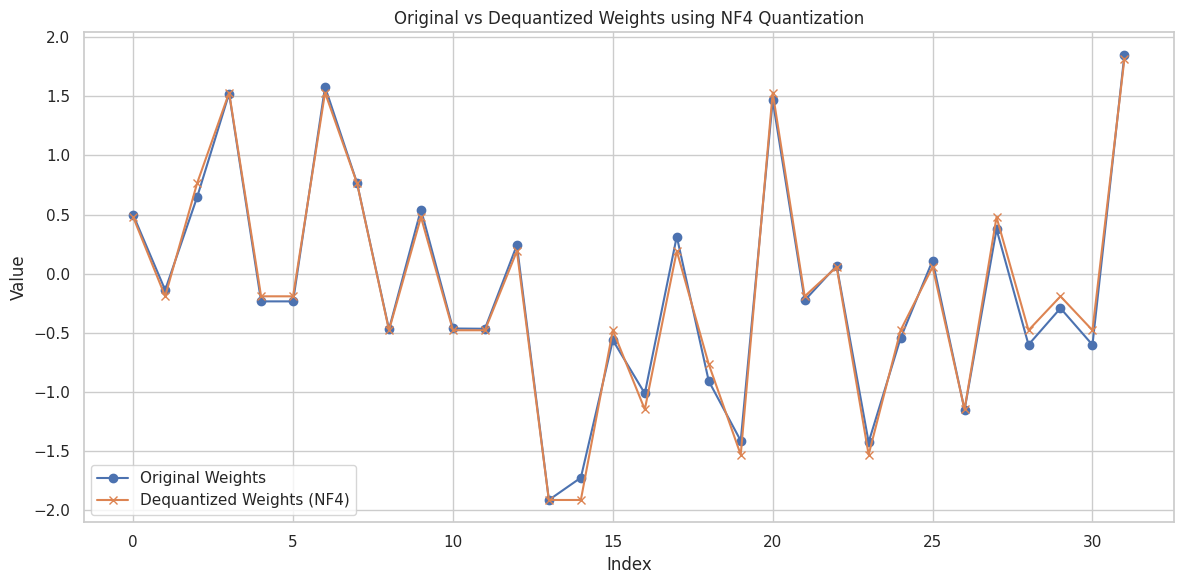

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulated original weights (normally distributed like real LLM weights)
np.random.seed(42)
original_weights = np.random.normal(loc=0.0, scale=1.0, size=32)

# Step 1: Define an NF4-like non-uniform codebook (16 values)
# These are example values roughly based on the NF4 paper and bitsandbytes implementation
nf4_codebook = np.array([
    -1.00, -0.80, -0.60, -0.40,
    -0.25, -0.10, -0.03,  0.00,
     0.03,  0.10,  0.25,  0.40,
     0.60,  0.80,  0.95,  1.00
])

# Step 2: Normalize original weights to [-1, 1] for compatibility with codebook
max_abs = np.max(np.abs(original_weights))
normalized_weights = original_weights / max_abs

# Step 3: Quantize using nearest neighbor in NF4 codebook
quantized_indices = np.argmin(np.abs(normalized_weights[:, None] - nf4_codebook[None, :]), axis=1)
quantized_values = nf4_codebook[quantized_indices]

# Step 4: Dequantize (rescale to original magnitude)
dequantized = quantized_values * max_abs

# Step 5: Tabulate and plot
df_nf4 = pd.DataFrame({
    "Original": original_weights,
    "Normalized": normalized_weights,
    "Quantized (Code)": quantized_indices,
    "Quantized (Value)": quantized_values,
    "Dequantized": dequantized,
    "Error": original_weights - dequantized
})

import seaborn as sns
sns.set(style="whitegrid")

# Plot original vs dequantized (NF4)
plt.figure(figsize=(12, 6))
plt.plot(original_weights, label="Original Weights", marker='o')
plt.plot(dequantized, label="Dequantized Weights (NF4)", marker='x')
plt.title("Original vs Dequantized Weights using NF4 Quantization")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()
